In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sentiment Analysis Libraries
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [3]:
# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)

print("All libraries imported successfully!")

All libraries imported successfully!


In [14]:
# Sample tweets for demonstration
sample_tweets = [
    "I absolutely love this new iPhone! Best phone ever! 📱❤️",
    "This movie was terrible. Waste of my time and money 😠",
    "Just had coffee. It was okay, nothing special.",
    "OMG! Just got promoted at work! So excited! 🎉🎉",
    "Traffic is so bad today. Really frustrated 😤",
    "The weather is cloudy today.",
    "Best vacation ever! Hawaii is amazing! 🏖️☀️",
    "This restaurant has terrible service. Never going back!",
    "Watching TV. Pretty boring show.",
    "I'm so grateful for my friends and family ❤️",
    "This app keeps crashing! So annoying! 😡",
    "Had a normal day at work. Nothing exciting.",
    "Can't wait for the weekend! Going to be epic! 🎊",
    "Disappointed with this purchase. Expected better quality.",
    "Reading a book. It's interesting enough.",
    "AMAZING concert last night! Best night ever! 🎵",
    "My flight got cancelled. What a nightmare! ✈️😭",
    "Had lunch today. Food was decent.",
    "So proud of my team! We won the championship! 🏆",
    "This weather is depressing. Need some sunshine ☀️",
    "https://forms.office.com/r/HzwDjtW1tC"
]

In [15]:
# Create DataFrame
df = pd.DataFrame({'tweet': sample_tweets})

In [16]:
print(f"Created dataset with {len(df)} sample tweets\n")
print("Sample tweets:")
for i, tweet in enumerate(df['tweet'].head(5), 1):
    print(f"{i}. {tweet}")

Created dataset with 21 sample tweets

Sample tweets:
1. I absolutely love this new iPhone! Best phone ever! 📱❤️
2. This movie was terrible. Waste of my time and money 😠
3. Just had coffee. It was okay, nothing special.
4. OMG! Just got promoted at work! So excited! 🎉🎉
5. Traffic is so bad today. Really frustrated 😤


In [17]:
def clean_tweet(text):
    """Clean tweet text for better analysis"""
    if pd.isna(text):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions (keep for context but can be removed)
    # text = re.sub(r'@\w+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

In [18]:
def extract_hashtags(text):
    """Extract hashtags from tweet"""
    return re.findall(r'#\w+', text)

def extract_mentions(text):
    """Extract mentions from tweet"""
    return re.findall(r'@\w+', text)

In [19]:
# Apply preprocessing
df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
df['hashtags'] = df['tweet'].apply(extract_hashtags)
df['mentions'] = df['tweet'].apply(extract_mentions)

print("\nPreprocessing completed!")


Preprocessing completed!


In [20]:
df

,tweet,cleaned_tweet,hashtags,mentions
0,I absolutely love this new iPhone! Best phone ...,I absolutely love this new iPhone! Best phone ...,[],[]
1,This movie was terrible. Waste of my time and ...,This movie was terrible. Waste of my time and ...,[],[]
2,"Just had coffee. It was okay, nothing special.","Just had coffee. It was okay, nothing special.",[],[]
3,OMG! Just got promoted at work! So excited! 🎉🎉,OMG! Just got promoted at work! So excited! 🎉🎉,[],[]
4,Traffic is so bad today. Really frustrated 😤,Traffic is so bad today. Really frustrated 😤,[],[]
5,The weather is cloudy today.,The weather is cloudy today.,[],[]
6,Best vacation ever! Hawaii is amazing! 🏖️☀️,Best vacation ever! Hawaii is amazing! 🏖️☀️,[],[]
7,This restaurant has terrible service. Never go...,This restaurant has terrible service. Never go...,[],[]
8,Watching TV. Pretty boring show.,Watching TV. Pretty boring show.,[],[]
9,I'm so grateful for my friends and family ❤️,I'm so grateful for my friends and family ❤️,[],[]


In [21]:
# SENTIMENT ANALYSIS USING TEXTBLOB
print("\n" + "="*50)
print("TEXTBLOB SENTIMENT ANALYSIS")
print("="*50)

def get_textblob_sentiment(text):
    """Get sentiment using TextBlob"""
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Classify based on polarity
    if polarity > 0.1:
        sentiment = 'Positive'
    elif polarity < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return sentiment, polarity, subjectivity


TEXTBLOB SENTIMENT ANALYSIS


In [22]:
# Apply TextBlob analysis
textblob_results = df['tweet'].apply(lambda x: get_textblob_sentiment(x))
df['textblob_sentiment'] = textblob_results.apply(lambda x: x[0])
df['textblob_polarity'] = textblob_results.apply(lambda x: x[1])
df['textblob_subjectivity'] = textblob_results.apply(lambda x: x[2])


In [24]:
textblob_results

0     (Positive, 0.5568181818181818, 0.4515151515151...
1                                 (Negative, -0.6, 0.5)
2     (Positive, 0.4285714285714286, 0.5357142857142...
3                             (Positive, 0.46875, 0.75)
4                 (Negative, -0.7, 0.43333333333333335)
5                                   (Neutral, 0.0, 0.0)
6                                (Positive, 0.875, 0.6)
7                                 (Negative, -0.5, 0.5)
8                               (Negative, -0.375, 1.0)
9                                   (Neutral, 0.0, 0.0)
10                                (Negative, -1.0, 0.9)
11               (Positive, 0.22499999999999998, 0.725)
12                               (Positive, 0.125, 0.4)
13    (Negative, -0.11666666666666665, 0.54999999999...
14                                (Positive, 0.25, 0.5)
15    (Positive, 0.5333333333333333, 0.4222222222222...
16                                  (Neutral, 0.0, 0.0)
17    (Positive, 0.16666666666666666, 0.66666666

In [23]:
# Display results
print("TextBlob Results (First 10 tweets):")
print("-" * 80)
for i in range(min(10, len(df))):
    tweet = df.iloc[i]['tweet']
    sentiment = df.iloc[i]['textblob_sentiment']
    polarity = df.iloc[i]['textblob_polarity']
    
    print(f"{i+1}. {tweet[:60]}...")
    print(f"   Sentiment: {sentiment} (Polarity: {polarity:.3f})")
    print()

TextBlob Results (First 10 tweets):
--------------------------------------------------------------------------------
1. I absolutely love this new iPhone! Best phone ever! 📱❤️...
   Sentiment: Positive (Polarity: 0.557)

2. This movie was terrible. Waste of my time and money 😠...
   Sentiment: Negative (Polarity: -0.600)

3. Just had coffee. It was okay, nothing special....
   Sentiment: Positive (Polarity: 0.429)

4. OMG! Just got promoted at work! So excited! 🎉🎉...
   Sentiment: Positive (Polarity: 0.469)

5. Traffic is so bad today. Really frustrated 😤...
   Sentiment: Negative (Polarity: -0.700)

6. The weather is cloudy today....
   Sentiment: Neutral (Polarity: 0.000)

7. Best vacation ever! Hawaii is amazing! 🏖️☀️...
   Sentiment: Positive (Polarity: 0.875)

8. This restaurant has terrible service. Never going back!...
   Sentiment: Negative (Polarity: -0.500)

9. Watching TV. Pretty boring show....
   Sentiment: Negative (Polarity: -0.375)

10. I'm so grateful for my friends an

In [25]:
# TextBlob sentiment distribution
textblob_counts = df['textblob_sentiment'].value_counts()
print("TextBlob Sentiment Distribution:")
print(textblob_counts)
print(f"Percentages: {textblob_counts/len(df)*100}")

TextBlob Sentiment Distribution:
textblob_sentiment
Positive    10
Negative     7
Neutral      4
Name: count, dtype: int64
Percentages: textblob_sentiment
Positive    47.619048
Negative    33.333333
Neutral     19.047619
Name: count, dtype: float64


In [27]:
# SENTIMENT ANALYSIS USING VADER    
print("\n" + "="*50)
print("VADER SENTIMENT ANALYSIS")
print("="*50)


VADER SENTIMENT ANALYSIS


In [28]:
# Initialize VADER analyzer
vader_analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """Get sentiment using VADER"""
    scores = vader_analyzer.polarity_scores(text)
    
    # Get compound score for overall sentiment
    compound = scores['compound']
    
    # Classify based on compound score
    if compound >= 0.05:
        sentiment = 'Positive'
    elif compound <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return sentiment, scores

In [29]:
# Apply VADER analysis
vader_results = df['tweet'].apply(lambda x: get_vader_sentiment(x))
df['vader_sentiment'] = vader_results.apply(lambda x: x[0])
df['vader_scores'] = vader_results.apply(lambda x: x[1])
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
df['vader_positive'] = df['vader_scores'].apply(lambda x: x['pos'])
df['vader_negative'] = df['vader_scores'].apply(lambda x: x['neg'])
df['vader_neutral'] = df['vader_scores'].apply(lambda x: x['neu'])

# Display results
print("VADER Results (First 10 tweets):")
print("-" * 80)
for i in range(min(10, len(df))):
    tweet = df.iloc[i]['tweet']
    sentiment = df.iloc[i]['vader_sentiment']
    compound = df.iloc[i]['vader_compound']
    
    print(f"{i+1}. {tweet[:60]}...")
    print(f"   Sentiment: {sentiment} (Compound: {compound:.3f})")
    print()


VADER Results (First 10 tweets):
--------------------------------------------------------------------------------
1. I absolutely love this new iPhone! Best phone ever! 📱❤️...
   Sentiment: Positive (Compound: 0.883)

2. This movie was terrible. Waste of my time and money 😠...
   Sentiment: Negative (Compound: -0.848)

3. Just had coffee. It was okay, nothing special....
   Sentiment: Negative (Compound: -0.092)

4. OMG! Just got promoted at work! So excited! 🎉🎉...
   Sentiment: Positive (Compound: 0.909)

5. Traffic is so bad today. Really frustrated 😤...
   Sentiment: Negative (Compound: -0.848)

6. The weather is cloudy today....
   Sentiment: Neutral (Compound: 0.000)

7. Best vacation ever! Hawaii is amazing! 🏖️☀️...
   Sentiment: Positive (Compound: 0.862)

8. This restaurant has terrible service. Never going back!...
   Sentiment: Negative (Compound: -0.525)

9. Watching TV. Pretty boring show....
   Sentiment: Positive (Compound: 0.226)

10. I'm so grateful for my friends and f

In [30]:
# VADER sentiment distribution
vader_counts = df['vader_sentiment'].value_counts()
print("VADER Sentiment Distribution:")
print(vader_counts)
print(f"Percentages: {vader_counts/len(df)*100}")

VADER Sentiment Distribution:
vader_sentiment
Positive    9
Negative    8
Neutral     4
Name: count, dtype: int64
Percentages: vader_sentiment
Positive    42.857143
Negative    38.095238
Neutral     19.047619
Name: count, dtype: float64


In [31]:
# COMPARISON ANALYSIS
print("\n" + "="*50)
print("COMPARISON: TEXTBLOB vs VADER")
print("="*50)



COMPARISON: TEXTBLOB vs VADER


In [32]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Tweet': df['tweet'],
    'TextBlob': df['textblob_sentiment'],
    'VADER': df['vader_sentiment'],
    'TextBlob_Score': df['textblob_polarity'],
    'VADER_Score': df['vader_compound']
})

print("Side-by-side Comparison (First 15 tweets):")
print("-" * 100)
for i in range(min(15, len(comparison_df))):
    tweet = comparison_df.iloc[i]['Tweet'][:50]
    tb_sent = comparison_df.iloc[i]['TextBlob']
    vader_sent = comparison_df.iloc[i]['VADER']
    tb_score = comparison_df.iloc[i]['TextBlob_Score']
    vader_score = comparison_df.iloc[i]['VADER_Score']
    
    agreement = "✓" if tb_sent == vader_sent else "✗"
    
    print(f"{i+1:2d}. {tweet}...")
    print(f"    TextBlob: {tb_sent:8s} ({tb_score:+.3f}) | VADER: {vader_sent:8s} ({vader_score:+.3f}) | Match: {agreement}")
    print()


Side-by-side Comparison (First 15 tweets):
----------------------------------------------------------------------------------------------------
 1. I absolutely love this new iPhone! Best phone ever...
    TextBlob: Positive (+0.557) | VADER: Positive (+0.883) | Match: ✓

 2. This movie was terrible. Waste of my time and mone...
    TextBlob: Negative (-0.600) | VADER: Negative (-0.848) | Match: ✓

 3. Just had coffee. It was okay, nothing special....
    TextBlob: Positive (+0.429) | VADER: Negative (-0.092) | Match: ✗

 4. OMG! Just got promoted at work! So excited! 🎉🎉...
    TextBlob: Positive (+0.469) | VADER: Positive (+0.909) | Match: ✓

 5. Traffic is so bad today. Really frustrated 😤...
    TextBlob: Negative (-0.700) | VADER: Negative (-0.848) | Match: ✓

 6. The weather is cloudy today....
    TextBlob: Neutral  (+0.000) | VADER: Neutral  (+0.000) | Match: ✓

 7. Best vacation ever! Hawaii is amazing! 🏖️☀️...
    TextBlob: Positive (+0.875) | VADER: Positive (+0.862) | Match:

In [33]:
# Calculate agreement percentage
agreement = (df['textblob_sentiment'] == df['vader_sentiment']).sum()
agreement_percentage = (agreement / len(df)) * 100
print(f"Agreement between TextBlob and VADER: {agreement}/{len(df)} ({agreement_percentage:.1f}%)")

Agreement between TextBlob and VADER: 13/21 (61.9%)


In [34]:
# VISUALIZATION
print("\n" + "="*50)
print("CREATING VISUALIZATIONS")
print("="*50)


CREATING VISUALIZATIONS


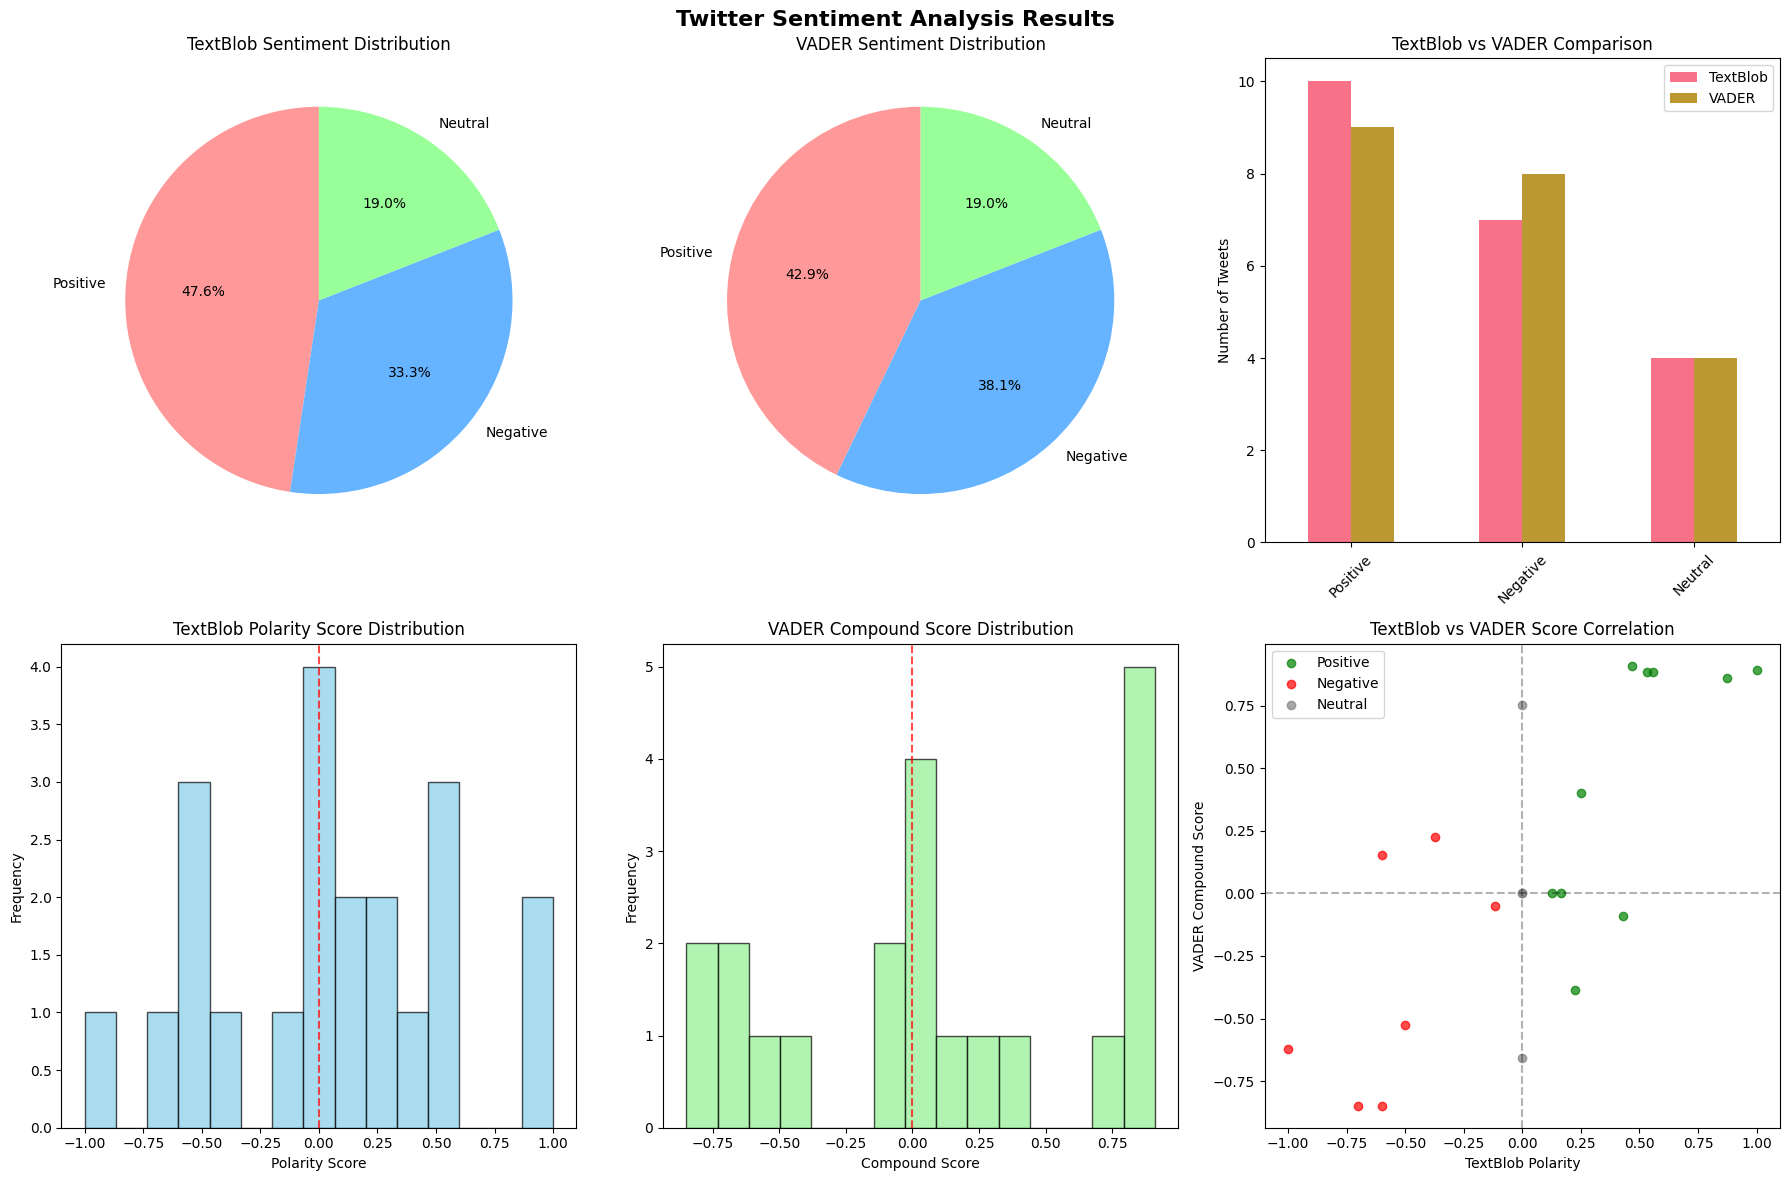

Visualizations created successfully!


In [37]:
#Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Twitter Sentiment Analysis Results', fontsize=16, fontweight='bold')

# 1. TextBlob Sentiment Distribution (Pie Chart)
textblob_counts = df['textblob_sentiment'].value_counts()
colors1 = ['#ff9999', '#66b3ff', '#99ff99']
axes[0, 0].pie(textblob_counts.values, labels=textblob_counts.index, autopct='%1.1f%%', 
               colors=colors1, startangle=90)
axes[0, 0].set_title('TextBlob Sentiment Distribution')

# 2. VADER Sentiment Distribution (Pie Chart)
vader_counts = df['vader_sentiment'].value_counts()
axes[0, 1].pie(vader_counts.values, labels=vader_counts.index, autopct='%1.1f%%', 
               colors=colors1, startangle=90)
axes[0, 1].set_title('VADER Sentiment Distribution')

# 3. Comparison Bar Chart
comparison_data = pd.DataFrame({
    'TextBlob': textblob_counts,
    'VADER': vader_counts
}).fillna(0)

comparison_data.plot(kind='bar', ax=axes[0, 2], rot=45)
axes[0, 2].set_title('TextBlob vs VADER Comparison')
axes[0, 2].set_ylabel('Number of Tweets')
axes[0, 2].legend()

# 4. Polarity Score Distribution (TextBlob)
axes[1, 0].hist(df['textblob_polarity'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 0].set_title('TextBlob Polarity Score Distribution')
axes[1, 0].set_xlabel('Polarity Score')
axes[1, 0].set_ylabel('Frequency')

# 5. Compound Score Distribution (VADER)
axes[1, 1].hist(df['vader_compound'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 1].set_title('VADER Compound Score Distribution')
axes[1, 1].set_xlabel('Compound Score')
axes[1, 1].set_ylabel('Frequency')

# 6. Scatter Plot: TextBlob vs VADER Scores
scatter_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
for sentiment in df['textblob_sentiment'].unique():
    mask = df['textblob_sentiment'] == sentiment
    axes[1, 2].scatter(df.loc[mask, 'textblob_polarity'], 
                      df.loc[mask, 'vader_compound'],
                      c=scatter_colors[sentiment], 
                      label=sentiment, alpha=0.7)

axes[1, 2].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1, 2].axvline(x=0, color='black', linestyle='--', alpha=0.3)
axes[1, 2].set_xlabel('TextBlob Polarity')
axes[1, 2].set_ylabel('VADER Compound Score')
axes[1, 2].set_title('TextBlob vs VADER Score Correlation')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")